In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [2]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [3]:
duomenys = np.random.randint(1, 10, 5)
# naujo stulpelio ir duomenu pridejimas
df['A']=duomenys
print(df)

   A
0  7
1  9
2  3
3  6
4  3


In [11]:
duomenysB = np.random.randint(5, 10, 5)
df['B']=duomenysB
print(df)

   A  B
0  7  9
1  9  9
2  3  9
3  6  6
4  3  8


In [5]:
# duomenu apzvalga:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       5 non-null      int32
 1   B       5 non-null      int32
dtypes: int32(2)
memory usage: 172.0 bytes


In [13]:
df.head(2)

,A,B
0,7,9
1,9,9


In [14]:
df.tail(3)

,A,B
2,3,9
3,6,6
4,3,8


In [15]:
cols=df.columns
print(cols)

Index(['A', 'B'], dtype='object')


In [16]:
for i in cols:
    print(i)

A
B


In [17]:
cols=list(df.columns)
print(cols)

['A', 'B']


In [18]:
#duomenu nuskaitymas
df14 = pd.read_csv('../../DATA/DUS2014.csv')
df14.head(2)

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,nuosavybe,bdu_val,nuts,vv_darb_sk,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,35.03,0,0.58,XL,0,1_49,20-29,0,A,0,...,B,6.0,LT,6,0,0,6.0,0,1,G4
1,2.39,0,0.54,XN,0,1_49,20-29,0,A,0,...,B,6.0,LT,12,0,0,6.0,0,2,G2


In [19]:
issilavinimas=df14['issilavinimas'] # cia Series objektas - visada 2 irasai
print(issilavinimas)

# stulpelis su eiluciu numeriais vadinamas indeksu, kitas stulpelis vadinasi vertes.

0        G4
1        G2
2        G4
3        G4
4        G2
         ..
44947    G4
44948    G4
44949    G4
44950    G4
44951    G4
Name: issilavinimas, Length: 44952, dtype: object


In [20]:
# series objektui index ir values:
indeksai = issilavinimas.index
print(indeksai)

RangeIndex(start=0, stop=44952, step=1)


In [21]:
vertes = issilavinimas.values
print(vertes)

['G4' 'G2' 'G4' ... 'G4' 'G4' 'G4']


In [22]:
lytis = df14['lytis'].values
print(lytis)

['M' 'F' 'F' ... 'F' 'F' 'F']


In [24]:
df=df14[['lytis', 'issilavinimas', 'amzius', 'bdu_spalio', 'profesija']]
df.head()

,lytis,issilavinimas,amzius,bdu_spalio,profesija
0,M,G4,20-29,6.00,261
1,F,G2,20-29,6.00,334
2,F,G4,40-49,6.00,221
3,F,G4,30-39,6.00,332
4,M,G2,40-49,11.33,962


In [25]:
import numpy as np
print(np.int_().dtype)

int64


In [29]:
df[df['lytis'] == 'F']

,lytis,issilavinimas,amzius,bdu_spalio,profesija
1,F,G2,20-29,6.00,334
2,F,G4,40-49,6.00,221
3,F,G4,30-39,6.00,332
7,F,G2,20-29,13.33,531
10,F,G3,40-49,10.00,334
...,...,...,...,...,...
44947,F,G4,50-59,3393.00,235
44948,F,G4,30-39,3639.67,233
44949,F,G4,50-59,3670.00,231
44950,F,G4,30-39,4212.00,231


In [30]:
df_f=df[(df['lytis'] == 'F') & (df['issilavinimas']== 'G4')]
print(df_f)

      lytis issilavinimas amzius  bdu_spalio  profesija
2         F            G4  40-49        6.00        221
3         F            G4  30-39        6.00        332
12        F            G4  30-39        6.00        241
14        F            G4  50-59       17.00        263
34        F            G4  40-49        9.67        121
...     ...           ...    ...         ...        ...
44947     F            G4  50-59     3393.00        235
44948     F            G4  30-39     3639.67        233
44949     F            G4  50-59     3670.00        231
44950     F            G4  30-39     4212.00        231
44951     F            G4  40-49     4218.00        231

[5344 rows x 5 columns]


In [31]:
df_f['bdu_spalio'].median()

np.float64(2691.835)

In [32]:
df_f['bdu_spalio'].mean()

np.float64(3039.6705276946113)

In [33]:
df_f['bdu_spalio'].max()

np.float64(27242.67)

In [34]:
df.query(expr='lytis == "F"')

,lytis,issilavinimas,amzius,bdu_spalio,profesija
1,F,G2,20-29,6.00,334
2,F,G4,40-49,6.00,221
3,F,G4,30-39,6.00,332
7,F,G2,20-29,13.33,531
10,F,G3,40-49,10.00,334
...,...,...,...,...,...
44947,F,G4,50-59,3393.00,235
44948,F,G4,30-39,3639.67,233
44949,F,G4,50-59,3670.00,231
44950,F,G4,30-39,4212.00,231


In [35]:
df.query(expr='lytis == "F" and issilavinimas == "G4"')

,lytis,issilavinimas,amzius,bdu_spalio,profesija
2,F,G4,40-49,6.00,221
3,F,G4,30-39,6.00,332
12,F,G4,30-39,6.00,241
14,F,G4,50-59,17.00,263
34,F,G4,40-49,9.67,121
...,...,...,...,...,...
44947,F,G4,50-59,3393.00,235
44948,F,G4,30-39,3639.67,233
44949,F,G4,50-59,3670.00,231
44950,F,G4,30-39,4212.00,231


In [36]:
edu = ['G1', 'G2']
for e in edu:
    print(df.query(expr='issilavinimas == @e'))



      lytis issilavinimas amzius  bdu_spalio  profesija
8         M            G1  20-29        6.67        912
51        M            G1  20-29      160.33        962
68        F            G1  30-39     1041.00        524
70        M            G1  14-19     1061.00        752
89        M            G1  40-49      418.67        932
...     ...           ...    ...         ...        ...
41133     M            G1  40-49     2978.00        541
41204     M            G1  50-59     1781.00        821
41247     F            G1  30-39     1267.67        322
41478     F            G1  50-59     2135.67        222
41509     F            G1  50-59     2144.00        322

[1716 rows x 5 columns]
      lytis issilavinimas amzius  bdu_spalio  profesija
1         F            G2  20-29        6.00        334
4         M            G2  40-49       11.33        962
5         M            G2  30-39        6.00        122
7         F            G2  20-29       13.33        531
9         M            

In [37]:
df['$'] = df['bdu_spalio']/3.4528
df.head()

# import warnings
# warnings.filterwarnings('ignore')

C:\Users\pauli\AppData\Local\Temp\ipykernel_22128\2691138167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['$'] = df['bdu_spalio']/3.4528


,lytis,issilavinimas,amzius,bdu_spalio,profesija,$
0,M,G4,20-29,6.00,261,1.737720
1,F,G2,20-29,6.00,334,1.737720
2,F,G4,40-49,6.00,221,1.737720
3,F,G4,30-39,6.00,332,1.737720
4,M,G2,40-49,11.33,962,3.281395


In [70]:
df1=df14[['issilavinimas', 'bdu_spalio', 'lytis']]
issilavinimas=['G1', 'G2', 'G3', 'G4']
lytis=['F', 'M']

for i in lytis:
    for j in issilavinimas:
        mediana=round(df1.query(expr='lytis == @i and issilavinimas == @j')['bdu_spalio'].median(), 0)
        vidurkis=round(df1.query(expr='lytis == @i and issilavinimas == @j')['bdu_spalio'].mean(), 0)
        print(f'{j} | {vidurkis} | {mediana}  | {i}')


G1 | 1407.0 | 1256.0  | F
G2 | 1571.0 | 1395.0  | F
G3 | 2190.0 | 1974.0  | F
G4 | 3040.0 | 2692.0  | F
G1 | 1762.0 | 1486.0  | M
G2 | 2129.0 | 1884.0  | M
G3 | 2900.0 | 2500.0  | M
G4 | 4159.0 | 3400.0  | M


In [67]:
df1=df14[['issilavinimas', 'bdu_spalio', 'lytis']]
issilavinimas=sorted(list(set(df1['issilavinimas'])))
lytis=sorted(list(set(df1['lytis'])))

for i in lytis:
    for j in issilavinimas:
        m = df1.query(expr='lytis == @i and issilavinimas == @j')
        mediana=round(m['bdu_spalio'].median(), 0)
        vidurkis=round(m['bdu_spalio'].mean(), 0)
        print(f'{j} | {vidurkis} | {mediana}  | {i}')

G1 | 1407.0 | 1256.0  | F
G2 | 1571.0 | 1395.0  | F
G3 | 2190.0 | 1974.0  | F
G4 | 3040.0 | 2692.0  | F
G1 | 1762.0 | 1486.0  | M
G2 | 2129.0 | 1884.0  | M
G3 | 2900.0 | 2500.0  | M
G4 | 4159.0 | 3400.0  | M


In [71]:
#destytojo variantas

edu = ['G1','G2', 'G3', 'G4']

for e in edu:
    fv = df.query(expr='issilavinimas == @e and lytis == "F"')['bdu_spalio'].mean()
    fm = df.query(expr='issilavinimas == @e and lytis == "F"')['bdu_spalio'].median()
    print(f'{e:5}|{fv:5.2f}|{fm:5.2f}|{"Mot":5}')

for e in edu:
    fv = df.query(expr='issilavinimas == @e and lytis == "M"')['bdu_spalio'].mean()
    fm = df.query(expr='issilavinimas == @e and lytis == "M"')['bdu_spalio'].median()
    print(f'{e:5}|{fv:5.2f}|{fm:5.2f}|{"Vyr":5}')

G1   |1406.67|1256.50|Mot  
G2   |1571.05|1395.00|Mot  
G3   |2190.46|1974.00|Mot  
G4   |3039.67|2691.84|Mot  
G1   |1762.30|1485.66|Vyr  
G2   |2129.49|1884.00|Vyr  
G3   |2900.46|2500.00|Vyr  
G4   |4158.56|3400.00|Vyr  


lytis
M    22586
F    22366
Name: count, dtype: int64
M 22586
F 22366


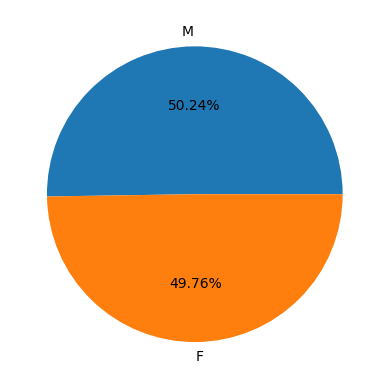

In [76]:
# value_counts()

c = df['lytis'].value_counts()
print(c)
lytys = c.index
kiekiai = c.values

for li , ci in zip(lytys, kiekiai):
    print(li, ci)


plt.pie(x = kiekiai, labels = lytys, autopct='%.2f%%')

plt.show()

In [80]:
edus = df['issilavinimas'].value_counts()
print(edus)
edus = df['issilavinimas'].value_counts().sort_index(ascending = True).index
print(edus)
edus = df['issilavinimas'].value_counts().sort_index(ascending = True).index.to_list()
print(edus)

issilavinimas
G2    22059
G3    12178
G4     8999
G1     1716
Name: count, dtype: int64
Index(['G1', 'G2', 'G3', 'G4'], dtype='object', name='issilavinimas')
['G1', 'G2', 'G3', 'G4']


In [88]:
# Parašykite ciklą, kuris surašytų atlyginimų vidurkius bei medianas
# pagal amžiaus grupes (2014 metams, eurais)
# amžiaus grupes gaukite naudodamiesi value_counts()
# tvarkingesniam atvaizdavimui pasinaudokite f-strings
# išvestyje pridėkite dar ir skirtumą tarp vidurkio ir medianos (vidurkis-mediana)

df1=df14[['bdu_spalio', 'amzius']]

amzius= df1['amzius'].value_counts().sort_index(ascending = True).index.to_list()

for i in amzius:
    mediana=round(df1.query(expr='amzius == @i')['bdu_spalio'].median()/3.4528, 0)
    vidurkis=round(df1.query(expr='amzius == @i')['bdu_spalio'].mean()/3.4528, 0)
    print(f'{i:7}|{vidurkis:5}|{mediana:7}|{(vidurkis-mediana):7}')

14-19  |362.0|  351.0|   11.0
20-29  |609.0|  534.0|   75.0
30-39  |796.0|  651.0|  145.0
40-49  |701.0|  560.0|  141.0
50-59  |667.0|  543.0|  124.0
60+    |627.0|  513.0|  114.0


In [ ]:
# value_counts() ir pie plot:
# kiek procentų buvo vyrų, moterų 2014 metais?
# kiek procentų buvo iš kiekvienos amžiaus grupės?
# kiek procentų buvo iš kiekvienos išsilavinimo pakopos?
# kiek respondentų buvo iš privataus (B) bei viešojo (A) sektoriaus? (stulpelis: nuosavybe)
# kiek procentaliai buvo vyrų, moterų iš didelių, vidutinių, mažų įmonių? (Stulpelis im_dydis, 
# du pie plot'ai, vienas vyrams, kitas moterims)

M 22586
F 22366


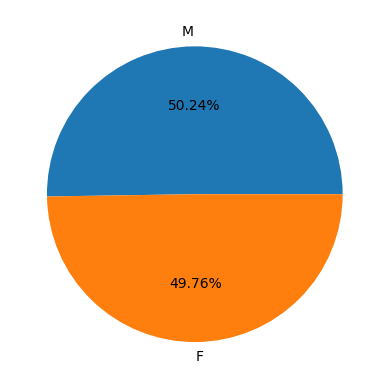

In [89]:
c = df['lytis'].value_counts()
lytys = c.index
kiekiai = c.values
for li , ci in zip(lytys, kiekiai):
    print(li, ci)
    
plt.pie(x = kiekiai, labels = lytys, autopct='%.2f%%')

plt.show()

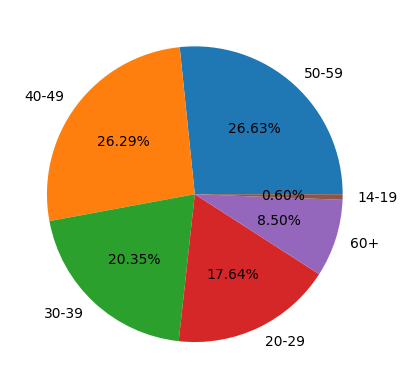

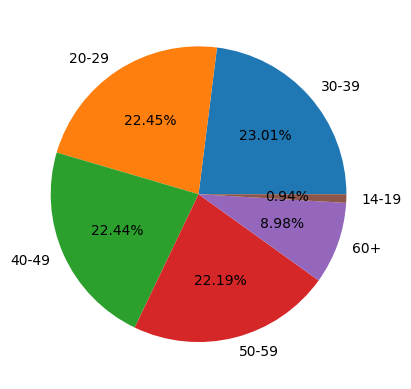

In [94]:
c = df.query('lytis ==  "F"')['amzius'].value_counts()
amziusF = c.index
kiekiaiF = c.values

plt.pie(x = kiekiaiF, labels = amziusF, autopct='%.2f%%')

plt.show()

c = df.query('lytis ==  "M"')['amzius'].value_counts()
amziusM = c.index
kiekiaiM = c.values

plt.pie(x = kiekiaiM, labels = amziusM, autopct='%.2f%%')

plt.show()

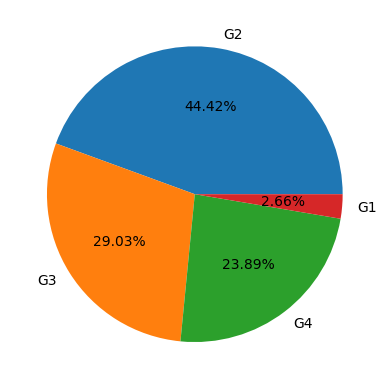

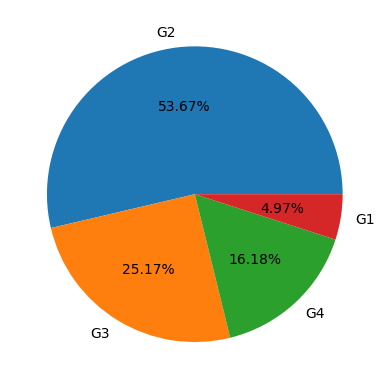

In [97]:
c = df.query('lytis ==  "F"')['issilavinimas'].value_counts()
amziusF = c.index
kiekiaiF = c.values

plt.pie(x = kiekiaiF, labels = amziusF, autopct='%.2f%%')

plt.show()

c = df.query('lytis ==  "M"')['issilavinimas'].value_counts()
amziusM = c.index
kiekiaiM = c.values

plt.pie(x = kiekiaiM, labels = amziusM, autopct='%.2f%%')

plt.show()

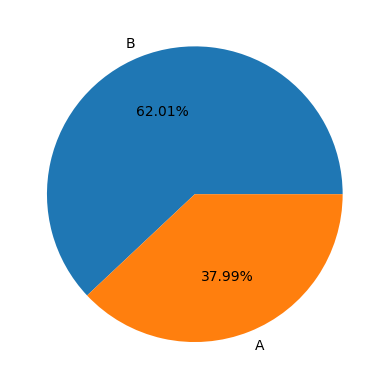

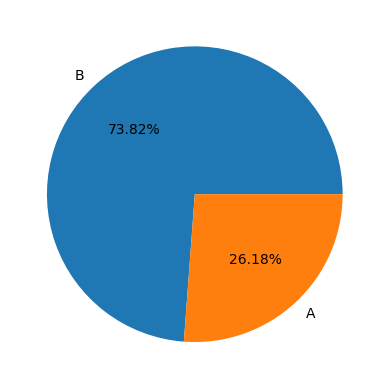

In [100]:
c = df14.query('lytis ==  "F"')['nuosavybe'].value_counts()
amziusF = c.index
kiekiaiF = c.values

plt.pie(x = kiekiaiF, labels = amziusF, autopct='%.2f%%')

plt.show()

c = df14.query('lytis ==  "M"')['nuosavybe'].value_counts()
amziusM = c.index
kiekiaiM = c.values

plt.pie(x = kiekiaiM, labels = amziusM, autopct='%.2f%%')

plt.show()

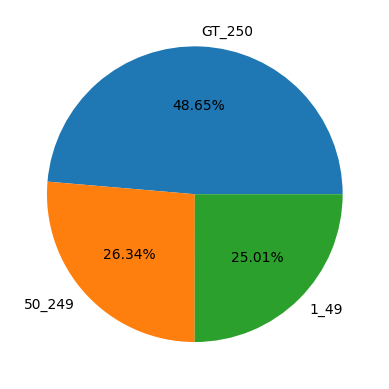

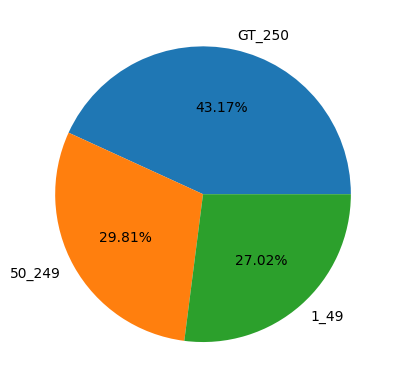

In [102]:
c = df14.query('lytis ==  "F"')['im_dydis'].value_counts()
amziusF = c.index
kiekiaiF = c.values

plt.pie(x = kiekiaiF, labels = amziusF, autopct='%.2f%%')

plt.show()

c = df14.query('lytis ==  "M"')['im_dydis'].value_counts()
amziusM = c.index
kiekiaiM = c.values

plt.pie(x = kiekiaiM, labels = amziusM, autopct='%.2f%%')

plt.show()